# **Insurance Policy HelpMate AI**

Project is available in my Github: https://github.com/yavisankar/HelpMateAI/

# **Insurance Policy HelpMate AI**

## **Introduction**  
Welcome to the **Insurance Policy HelpMate AI** project! This notebook demonstrates how to build an AI-driven assistant that helps users understand, compare, and manage insurance policies efficiently.  

## **Objective**  
The goal is to create an intelligent system that assists users in navigating insurance policies by providing:  
- **Personalized recommendations** based on user needs.  
- **Comparison of different policies** to highlight key differences.  
- **Guidance on the claims process** to simplify documentation and submission.  
- **Regulatory insights** to explain legal terms and policy conditions.  

## **Features**  
- **Policy Recommendations:** Suggest the best insurance policy based on coverage needs and budget.  
- **Policy Comparison:** Highlight differences in coverage, premium, exclusions, and benefits.  
- **Claims Assistance:** Guide users through the claims process with documentation support.  
- **Renewal Alerts:** Remind users about policy renewals and suggest alternatives if needed.  

## **Technologies Used**  
- **OpenAI's GPT Model:** For understanding user queries and generating policy recommendations.  
- **APIs:** To fetch live insurance data, premium rates, and claim status updates.  
- **Python Libraries:** For data processing, visualization, and integration with external services.  

## **How It Works**  
1. **User Inputs** details such as insurance type (health, auto, life, etc.), budget, and coverage requirements.  
2. **AI Processes** the data and retrieves relevant policy information.  
3. **Personalized Recommendations** are generated based on affordability and coverage suitability.  
4. **Comparison & Explanation** help users make informed decisions.  
5. **Ongoing Assistance** includes claim support, policy renewal reminders, and answering user queries.  

**Let's get started on building your AI-powered insurance assistant!**


### **Project Background**  

Choosing the right insurance policy is a complex and often overwhelming task. Consumers must navigate a wide range of options, comparing coverage, premiums, exclusions, and terms across different providers. Understanding policy details, filing claims, and staying updated on renewals can be daunting, especially for those unfamiliar with insurance terminology and regulations.  

With the advancement of AI technologies like ChatGPT, we have an opportunity to simplify this process. By leveraging natural language processing, machine learning, and real-time data integration, we can develop an intelligent assistant that helps users understand, compare, and manage insurance policies effectively.  

This project aims to create an **AI-powered Insurance Policy HelpMate**, providing users with personalized recommendations, easy-to-understand policy comparisons, and real-time assistance with claims and renewals. By automating and simplifying these processes, the system will enhance decision-making and improve the overall user experience.  

---

### **Problem Statement**  

Navigating insurance policies can be challenging due to several key issues:  

1. **Complexity of Policy Terms:** Insurance documents are often filled with technical jargon, making it difficult for users to understand coverage details and exclusions.  
2. **Overwhelming Choices:** Consumers are presented with a vast number of insurance providers and plans, leading to decision fatigue.  
3. **Lack of Personalization:** Many existing insurance recommendation tools provide generic suggestions that may not align with individual needs and financial situations.  
4. **Inefficient Claims Process:** Users struggle with understanding claim procedures, required documents, and processing times, leading to frustration and delays.  
5. **Policy Management Challenges:** Tracking policy renewals, premium due dates, and coverage changes is often cumbersome, leading to lapses in coverage.  

To address these challenges, we propose **Insurance Policy HelpMate AI**, an AI-driven assistant designed to provide users with personalized policy recommendations, simplified explanations, easy-to-use comparison tools, and step-by-step claims guidance. This system will enhance accessibility, transparency, and efficiency in managing insurance policies.  


## Approach:
# Project Implementation: Three-Layer Approach

The project should implement all three layers effectively. It will be key to try out various strategies and experiments in each layer to build an effective search system. Let's explore what you need to do in each of the layers and the possible experimentations that you can perform based on various choices.

## The Embedding Layer

The PDF document needs to be effectively processed, cleaned, and chunked for the embeddings. Here, the choice of the chunking strategy will have a large impact on the final quality of the retrieved results. So, make sure that you try out various strategies and compare their performances.

Another important aspect in the embedding layer is the choice of the embedding model. You can choose to embed your chunks using the **OpenAI embedding model** or any model from the **SentenceTransformers** library on **HuggingFace**.

## The Search Layer

1. **Design Queries**  
   - First need to design at least **three queries** against which you will test the system.  
   - Skim through the document and accordingly come up with queries whose answers can be found in the policy document.

2. **Query Embedding and Search**  
   - Embed the queries and search **ChromaDB vector database** against each query.  
   - Implementing a **cache mechanism** is also mandatory.

3. **Re-Ranking Block**  
   - Finally, need to implement the **re-ranking block**.  
   - Can choose from a range of **cross-encoding models** on **HuggingFace**.

## The Generation Layer

In the **generation layer**, the final **prompt** that you design is the major component.  

- Ensure that the **prompt** is **exhaustive** in its instructions.  
- The **relevant information** should be correctly passed to the prompt.  


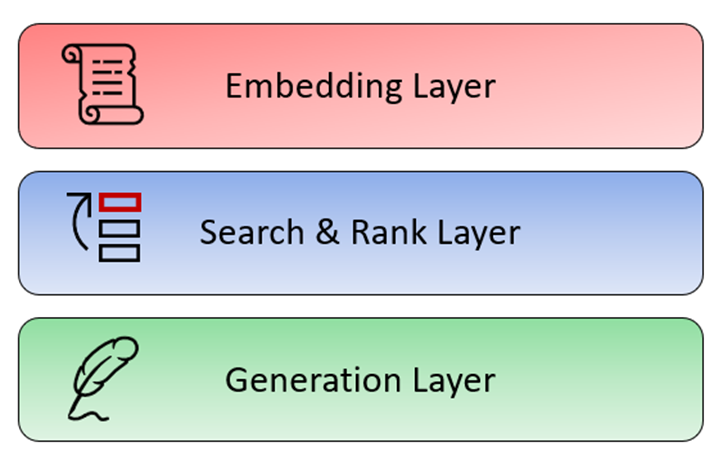

In [7]:
from IPython.display import Image

Image("Approach.png") 


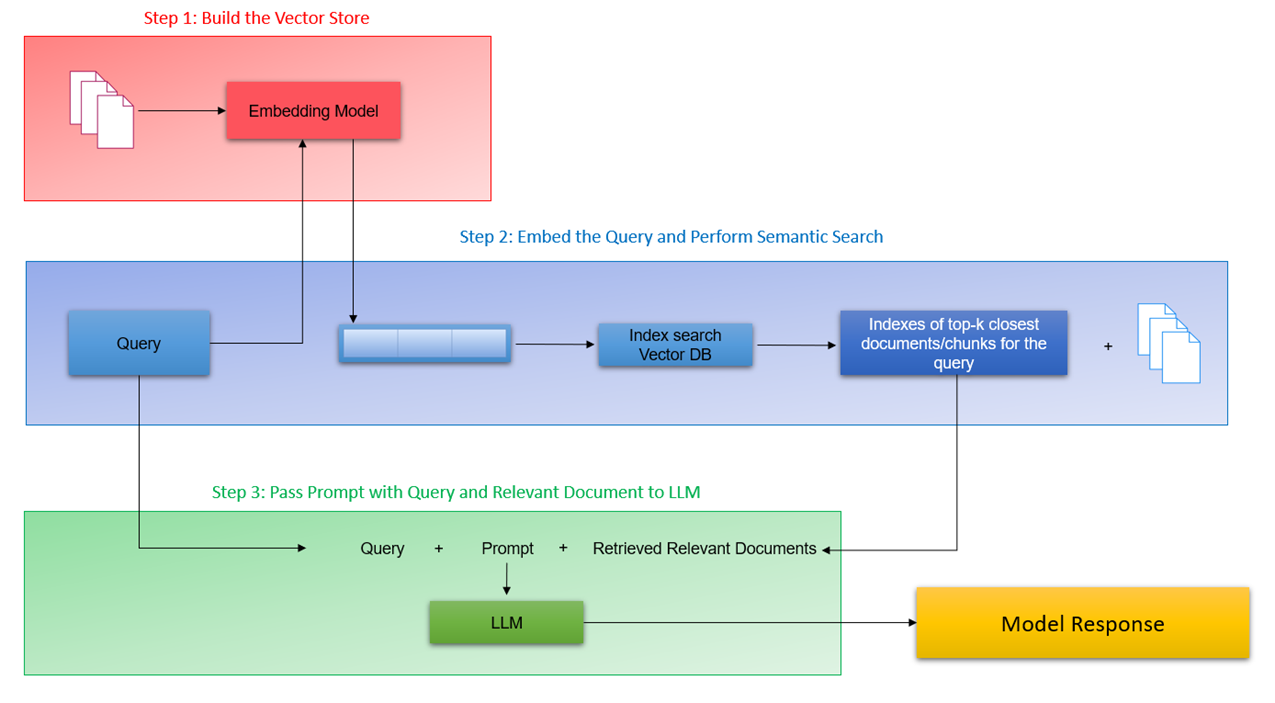

In [8]:
Image("RAG_Architecture.png") 

# 1. Reading Data

### 1.1- Import the libraries

In [47]:
# Install all the required libraries
!pip install -U -q pdfplumber tiktoken openai chromadb sentence-transformers

In [48]:
# Import all the required Libraries
import numpy as np
import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
import chromadb

#  <font color = red> 2. Embedding Layer

##  <font color = red> 2.1 Read, Process, and Chunk the PDF Files

We will be using [pdfplumber](https://https://pypi.org/project/pdfplumber/) to read and process the PDF files.

`pdfplumber` allows for better parsing of the PDF file as it can read various elements of the PDF apart from the plain text, such as, tables, images, etc. It also offers wide functionaties and visual debugging features to help with advanced preprocessing as well.

In [49]:
# Define the path of the PDF
#single_pdf_path = 'Principal-Sample-Life-Insurance-Policy.pdf'
single_pdf_path = '/content/drive/MyDrive/HelpMateAI/Principal-Sample-Life-Insurance-Policy.pdf'

#### <font color = red>  2.1.1 Reading a single PDF file and exploring it through pdfplumber

In [50]:
# Open the PDF file
with pdfplumber.open(single_pdf_path) as pdf:

    # Get one of the pages from the PDF and examine it
    single_page = pdf.pages[6]

    # Extract text from the first page
    text = single_page.extract_text()

    # Extract tables from the first page
    tables = single_page.extract_tables()

    # Print the extracted text
    print(text)

Section A – Eligibility
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Section B - Effective Dates
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Section C - Individual Terminations
Member Life Insurance Article 1
Member Accidental Death and Dismemberment Insurance Article 2
Dependent Life Insurance Article 3
Termination for Fraud Article 4
Coverage While Outside of the United States Article 5
Section D - Continuation
Member Life Insurance Article 1
Dependent Insurance - Developmentally Disabled or
Physically Handicapped Children Article 2
Section E - Reinstatement
Reinstatement Article 1
Federal Required Family and Medical Leave Act (FMLA) Article 2
Reinstatement of Coverage for a Member or Dependent When
Coverage Ends due to Living Outside of the United States Article 3
Section F - Individual Purchase Rights
Member Life In

In [51]:
# View the table in the page, if any
text

'Section A – Eligibility\nMember Life Insurance Article 1\nMember Accidental Death and Dismemberment Insurance Article 2\nDependent Life Insurance Article 3\nSection B - Effective Dates\nMember Life Insurance Article 1\nMember Accidental Death and Dismemberment Insurance Article 2\nDependent Life Insurance Article 3\nSection C - Individual Terminations\nMember Life Insurance Article 1\nMember Accidental Death and Dismemberment Insurance Article 2\nDependent Life Insurance Article 3\nTermination for Fraud Article 4\nCoverage While Outside of the United States Article 5\nSection D - Continuation\nMember Life Insurance Article 1\nDependent Insurance - Developmentally Disabled or\nPhysically Handicapped Children Article 2\nSection E - Reinstatement\nReinstatement Article 1\nFederal Required Family and Medical Leave Act (FMLA) Article 2\nReinstatement of Coverage for a Member or Dependent When\nCoverage Ends due to Living Outside of the United States Article 3\nSection F - Individual Purcha

#### <font color = red> 2.1.2 Extracting text from multiple PDFs

Let's now try and read multiple documents, extract text from them using appropriate preprocessing, and store them in a dataframe


In [52]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables

def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bbox.
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [53]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list

def extract_text_from_pdf(pdf_path):
    p = 0
    full_text = []


    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_no = f"Page {p+1}"
            text = page.extract_text()

            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]
            lines = []

            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table']))


            full_text.append([page_no, " ".join(lines)])
            p +=1

    return full_text

In [54]:
# Define the directory containing the PDF files
pdf_path = "/content/drive/MyDrive/HelpMateAI/Principal-Sample-Life-Insurance-Policy.pdf"

# Initialize an empty list to store the extracted texts and document names
data = []

# Process the PDF file
#print(f"...Processing {pdf_path.name}")

# Call the function to extract the text from the PDF
extracted_text = extract_text_from_pdf(pdf_path)

# Convert the extracted list to a PDF, and add a column to store document names
extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])
#extracted_text_df['Document Name'] = pdf_path.name

# Append the extracted text and document name to the list
data.append(extracted_text_df)

# Print a message to indicate progress
#print(f"Finished processing {pdf_path.name}")

# Print a message to indicate all PDFs have been processed
print("All PDFs have been processed.")

All PDFs have been processed.


In [55]:
data

[   Page No.                                          Page_Text
 0    Page 1  DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...
 1    Page 2                 This page left blank intentionally
 2    Page 3  POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...
 3    Page 4                 This page left blank intentionally
 4    Page 5  PRINCIPAL LIFE INSURANCE COMPANY (called The P...
 ..      ...                                                ...
 59  Page 60  I f a Dependent who was insured dies during th...
 60  Page 61  Section D - Claim Procedures Article 1 - Notic...
 61  Page 62  A claimant may request an appeal of a claim de...
 62  Page 63                 This page left blank intentionally
 63  Page 64  Principal Life Insurance Company Des Moines, I...
 
 [64 rows x 2 columns]]

In [56]:
# Concatenate all the DFs in the list 'data' together

insurance_pdfs_data = pd.concat(data, ignore_index=True)

In [57]:
# Check one of the extracted page texts to ensure that the text has been correctly read

insurance_pdfs_data.Page_Text[2]

'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees of that employer group. In addition, The Principal may arrange for third party service providers (i.e., optometrists, health clubs), to provide discounted goods and services to those employer groups who apply for coverage with The Principal or who become insureds/enrollees of The Principal. While The Principal has arranged these goods, services and/or third party provider discounts, the third party service providers are liable to the applicants/insureds/enrollees for the provision of such goods and/or services. The Principal is not responsible for the

In [58]:
# Let's also check the length of all the texts as there might be some empty pages or pages with very few words that we can drop

insurance_pdfs_data['Text_Length'] = insurance_pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [59]:
insurance_pdfs_data['Text_Length']

,Text_Length
0,30
1,5
2,230
3,5
4,110
...,...
59,285
60,418
61,322
62,5


In [60]:
# Retain only the rows with a text length of at least 10

insurance_pdfs_data = insurance_pdfs_data.loc[insurance_pdfs_data['Text_Length'] >= 10]
insurance_pdfs_data

,Page No.,Page_Text,Text_Length
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,30
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,230
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,110
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,153
6,Page 7,Section A – Eligibility Member Life Insurance ...,176
7,Page 8,Section A - Member Life Insurance Schedule of ...,171
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,387
9,Page 10,T he legally recognized union of two eligible ...,251
10,Page 11,(2) has been placed with the Member or spouse ...,299
11,Page 12,An institution that is licensed as a Hospital ...,352


In [61]:
# Store the metadata for each page in a separate column

insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: { 'Page_No.': x['Page No.']}, axis=1)
insurance_pdfs_data

,Page No.,Page_Text,Text_Length,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,30,{'Page_No.': 'Page 1'}
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,230,{'Page_No.': 'Page 3'}
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,110,{'Page_No.': 'Page 5'}
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,153,{'Page_No.': 'Page 6'}
6,Page 7,Section A – Eligibility Member Life Insurance ...,176,{'Page_No.': 'Page 7'}
7,Page 8,Section A - Member Life Insurance Schedule of ...,171,{'Page_No.': 'Page 8'}
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,387,{'Page_No.': 'Page 9'}
9,Page 10,T he legally recognized union of two eligible ...,251,{'Page_No.': 'Page 10'}
10,Page 11,(2) has been placed with the Member or spouse ...,299,{'Page_No.': 'Page 11'}
11,Page 12,An institution that is licensed as a Hospital ...,352,{'Page_No.': 'Page 12'}


This concludes the chunking aspect also, as we can see that mostly the pages contain few hundred words, maximum going upto 1000. So, we don't need to chunk the documents further; we can perform the embeddings on individual pages. This strategy makes sense for 2 reasons:
1. The way insurance documents are generally structured, you will not have a lot of extraneous information in a page, and all the text pieces in that page will likely be interrelated.
2. We want to have larger chunk sizes to be able to pass appropriate context to the LLM during the generation layer.

## 2.2 <font color = 'red'> Document Chunking </font>

We will generate embeddings for texts related to various Wikipedia articles. But since you are using large blocks of text, before generating the embeddings, you need to generate the chunks. Let's start with a basic chunking technique, and chunk the text by paragraph.

### 2.2.1 <font color = 'red'> Fixed-Size Chunking </font>

In fixed-size chunking, the document is split into fixed-size windows with each window representing a separate document chunk.

In [62]:
# Function to extract and store Wikipedia page information

def process_page(page_title):
    row = insurance_pdfs_data.loc[insurance_pdfs_data['Page No.'] == page_no].iloc[0]
    page = row.Page_Text
    metadata = row.Metadata

    if page is not None:
        chunk_size = 1000  # Set your desired chunk size (in characters)

        text_chunks = split_text_into_chunks(page, chunk_size)

        # Create a DataFrame to store the chunks and page title
        data = {'Title': [], 'Chunk Text': [], 'Metadata': []}

        for idx, chunk in enumerate(text_chunks):
            data['Title'].append(page_title)
            data['Chunk Text'].append(chunk)
            metadata['Chunk_No.'] = idx
            data['Metadata'].append(metadata)
        return pd.DataFrame(data)


In [63]:
# Function to split text into fixed-size chunks

def split_text_into_chunks(text, chunk_size):
    chunks = []
    words = text.split()  # Split the text into words

    current_chunk = []  # Store words for the current chunk
    current_chunk_word_count = 0  # Count of words in the current chunk

    for word in words:
        if current_chunk_word_count + len(word) + 1 <= chunk_size:
            current_chunk.append(word)
            current_chunk_word_count += len(word) + 1
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
            current_chunk_word_count = len(word)

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

In [64]:
# Iterating over all page titles to create the final df with individual chunks

all_dfs = []
page_nos = insurance_pdfs_data["Page No."].to_list()

for page_no in page_nos:
    df = process_page(page_no)
    if df is not None:
        all_dfs.append(df)


fixed_chunk_df = pd.concat(all_dfs, ignore_index=True)
fixed_chunk_df

,Title,Chunk Text,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}"
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}"
2,Page 3,provision of such goods and/or services nor is...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}"
3,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,"{'Page_No.': 'Page 5', 'Chunk_No.': 0}"
4,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,"{'Page_No.': 'Page 6', 'Chunk_No.': 1}"
...,...,...,...
125,Page 61,Section D - Claim Procedures Article 1 - Notic...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}"
126,Page 61,"of the loss. Proof required includes the date,...","{'Page_No.': 'Page 61', 'Chunk_No.': 2}"
127,Page 61,claim. Written notification will be sent to th...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}"
128,Page 62,A claimant may request an appeal of a claim de...,"{'Page_No.': 'Page 62', 'Chunk_No.': 1}"


## 2.3. <font color = 'red'> Generating Embeddings </font>

#### Encoding Pipeline

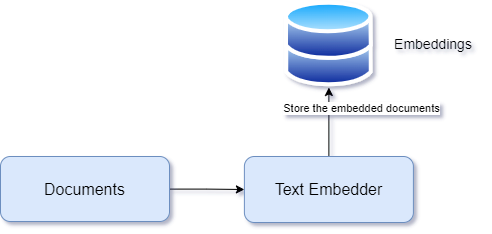

In [65]:
from sentence_transformers import SentenceTransformer, util

In [66]:
# Load pre-trained Sentence Transformer model

model_name = "all-MiniLM-L6-v2"
embedder = SentenceTransformer(model_name)

In [67]:
# Function to generate embeddings for text
def generate_embeddings(texts):
    embeddings = embedder.encode(texts, convert_to_tensor=True)
    return embeddings

In [68]:
def generate_embeddings_on_df(df):
  df['Embeddings'] = df['Chunk Text'].apply(lambda x: generate_embeddings([x])[0])

In [69]:
# Create embeddings for 'Chunk Text' column on all three dataframes

generate_embeddings_on_df(fixed_chunk_df)

In [70]:
fixed_chunk_df

,Title,Chunk Text,Metadata,Embeddings
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}","[tensor(-0.0259), tensor(0.0478), tensor(0.055..."
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0933), tensor(0.0039), tensor(0.013..."
2,Page 3,provision of such goods and/or services nor is...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0813), tensor(0.0781), tensor(0.008..."
3,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,"{'Page_No.': 'Page 5', 'Chunk_No.': 0}","[tensor(-0.0635), tensor(0.0587), tensor(0.072..."
4,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,"{'Page_No.': 'Page 6', 'Chunk_No.': 1}","[tensor(-0.0587), tensor(0.0146), tensor(0.038..."
...,...,...,...,...
125,Page 61,Section D - Claim Procedures Article 1 - Notic...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0822), tensor(0.1016), tensor(0.100..."
126,Page 61,"of the loss. Proof required includes the date,...","{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0371), tensor(0.1563), tensor(0.006..."
127,Page 61,claim. Written notification will be sent to th...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.1405), tensor(0.0794), tensor(0.085..."
128,Page 62,A claimant may request an appeal of a claim de...,"{'Page_No.': 'Page 62', 'Chunk_No.': 1}","[tensor(-0.0531), tensor(0.1203), tensor(0.072..."


## 2.4 <font color='red'> Visualise the Embeddings through Dimensionality Reduction </font>

<p align="justify"> Modern datasets often consist of numerous features or attributes, which creates a high-dimensional space in which our data resides. However, when trying to comprehend or visualize such data directly, we run into limitations – our brains struggle to visualize beyond three dimensions, and traditional visualization methods might not accurately represent the relationships between data points in high-dimensional spaces.


UMAP, which stands for [Uniform Manifold Approximation and Projection](https://https://pair-code.github.io/understanding-umap/) is a dimensionality reduction technique that reveals local and global data relationships. It transforms high-dimensional data into a lower-dimensional space, helping us visualize clusters, trends, and similarities.


[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a powerful tool in Python that can help us perform dimensionality reduction.

In [71]:
fixed_chunk_df["Embeddings"]

,Embeddings
0,"[tensor(-0.0259), tensor(0.0478), tensor(0.055..."
1,"[tensor(-0.0933), tensor(0.0039), tensor(0.013..."
2,"[tensor(-0.0813), tensor(0.0781), tensor(0.008..."
3,"[tensor(-0.0635), tensor(0.0587), tensor(0.072..."
4,"[tensor(-0.0587), tensor(0.0146), tensor(0.038..."
...,...
125,"[tensor(-0.0822), tensor(0.1016), tensor(0.100..."
126,"[tensor(-0.0371), tensor(0.1563), tensor(0.006..."
127,"[tensor(-0.1405), tensor(0.0794), tensor(0.085..."
128,"[tensor(-0.0531), tensor(0.1203), tensor(0.072..."


In [72]:
!pip install umap-learn

In [73]:
# Import umap for dimensionality reduction and matplotlib for plotting
from umap import UMAP
import matplotlib.pyplot as plt
import torch

In [74]:
embeddings = torch.tensor([[t.item() for t in row] for row in fixed_chunk_df["Embeddings"]])
embeddings

tensor([[-0.0259,  0.0478,  0.0559,  ..., -0.0493, -0.0585,  0.0236],
        [-0.0933,  0.0039,  0.0133,  ..., -0.0386,  0.0402, -0.0240],
        [-0.0813,  0.0781,  0.0086,  ..., -0.0321,  0.0683, -0.0703],
        ...,
        [-0.1405,  0.0794,  0.0854,  ..., -0.0364, -0.0044,  0.0100],
        [-0.0531,  0.1203,  0.0728,  ...,  0.0097, -0.0136,  0.0471],
        [-0.1324,  0.1325,  0.0853,  ...,  0.0126,  0.0480, -0.0251]])

In [75]:
# Reduce dimensionality with UMAP

reducer = UMAP(n_components = 2, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)
embeddings_2d

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



array([[ 6.2225432 , -0.74692965],
       [ 6.650119  , -0.8587835 ],
       [ 6.7710633 , -0.9291733 ],
       [ 6.420838  , -0.712672  ],
       [ 7.262966  , -2.276542  ],
       [ 7.0806108 , -2.6253605 ],
       [ 3.8595006 , -1.1248871 ],
       [ 5.881686  , -1.8040549 ],
       [ 3.8873305 , -0.01147567],
       [ 7.2525306 , -2.763601  ],
       [ 2.696504  , -2.5249186 ],
       [ 2.6694038 , -2.288471  ],
       [ 3.2672513 , -2.1046462 ],
       [ 4.5912    , -2.2850993 ],
       [ 4.8732815 , -2.2531307 ],
       [ 4.95021   , -2.211793  ],
       [ 3.1264071 , -2.8561294 ],
       [ 2.6278055 , -2.692071  ],
       [ 2.8355358 , -2.7007248 ],
       [ 7.135596  , -2.9503005 ],
       [ 2.6320708 , -2.930487  ],
       [ 4.443314  ,  0.11969849],
       [ 2.464353  , -2.5231829 ],
       [ 2.8661697 , -2.127415  ],
       [ 7.367578  , -3.0428169 ],
       [ 7.426955  , -2.219279  ],
       [ 7.2995563 , -2.1045103 ],
       [ 7.3192277 , -1.6426744 ],
       [ 7.651589  ,

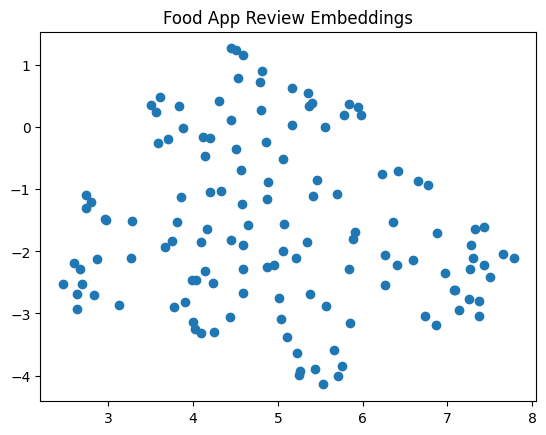

In [76]:
# Plot the embeddings

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title('Food App Review Embeddings')
plt.show()

## 2.5. <font color='red'> Cluster and Visualise the Embeddings with Plotly </font>

<p align="justify"> Let's now try and interpret the embedding space. We will first cluster the data points to check similar sentences. Clustering is a vital technique that groups similar data points together based on their closeness to each other.

#### From Embeddings to Clusters

<p align="justify"> By applying clustering algorithms to our embeddings, we can group together similar embeddings, effectively creating clusters of related data points. This process enables us to uncover meaningful categories or classes within our data and helps us interpret what the clusters actually mean

In [77]:
# Import the KMeans library

from sklearn.cluster import KMeans

In [78]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_2d)

In [79]:
fixed_chunk_df1 = fixed_chunk_df.copy()

In [80]:
# Add cluster labels as a new column to the DataFrame
fixed_chunk_df1['cluster_label'] = cluster_labels
fixed_chunk_df1

,Title,Chunk Text,Metadata,Embeddings,cluster_label
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}","[tensor(-0.0259), tensor(0.0478), tensor(0.055...",1
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0933), tensor(0.0039), tensor(0.013...",2
2,Page 3,provision of such goods and/or services nor is...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0813), tensor(0.0781), tensor(0.008...",2
3,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,"{'Page_No.': 'Page 5', 'Chunk_No.': 0}","[tensor(-0.0635), tensor(0.0587), tensor(0.072...",1
4,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,"{'Page_No.': 'Page 6', 'Chunk_No.': 1}","[tensor(-0.0587), tensor(0.0146), tensor(0.038...",2
...,...,...,...,...,...
125,Page 61,Section D - Claim Procedures Article 1 - Notic...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0822), tensor(0.1016), tensor(0.100...",1
126,Page 61,"of the loss. Proof required includes the date,...","{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0371), tensor(0.1563), tensor(0.006...",1
127,Page 61,claim. Written notification will be sent to th...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.1405), tensor(0.0794), tensor(0.085...",1
128,Page 62,A claimant may request an appeal of a claim de...,"{'Page_No.': 'Page 62', 'Chunk_No.': 1}","[tensor(-0.0531), tensor(0.1203), tensor(0.072...",1


In [81]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': fixed_chunk_df1['Chunk Text']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Life Insurance',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

fig.show()

## 2.6. Visualise the Embeddings in 3D

Let's now try to visualise the same embeddings in 3D. The process is almost exactly the same. This time, we will use the UMAP function to reduce the dimension to 3 instead of 2.

In [82]:
# Reduce dimensionality to 3 dimensions with UMAP

reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [83]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)

In [84]:
fixed_chunk_df2 = fixed_chunk_df.copy()

In [85]:
# Add cluster labels as a new column to the DataFrame
fixed_chunk_df2['cluster_label'] = cluster_labels

In [86]:
fixed_chunk_df2

,Title,Chunk Text,Metadata,Embeddings,cluster_label
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}","[tensor(-0.0259), tensor(0.0478), tensor(0.055...",1
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0933), tensor(0.0039), tensor(0.013...",2
2,Page 3,provision of such goods and/or services nor is...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[tensor(-0.0813), tensor(0.0781), tensor(0.008...",2
3,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,"{'Page_No.': 'Page 5', 'Chunk_No.': 0}","[tensor(-0.0635), tensor(0.0587), tensor(0.072...",1
4,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,"{'Page_No.': 'Page 6', 'Chunk_No.': 1}","[tensor(-0.0587), tensor(0.0146), tensor(0.038...",2
...,...,...,...,...,...
125,Page 61,Section D - Claim Procedures Article 1 - Notic...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0822), tensor(0.1016), tensor(0.100...",0
126,Page 61,"of the loss. Proof required includes the date,...","{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.0371), tensor(0.1563), tensor(0.006...",0
127,Page 61,claim. Written notification will be sent to th...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[tensor(-0.1405), tensor(0.0794), tensor(0.085...",2
128,Page 62,A claimant may request an appeal of a claim de...,"{'Page_No.': 'Page 62', 'Chunk_No.': 1}","[tensor(-0.0531), tensor(0.1203), tensor(0.072...",0


In [87]:
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': fixed_chunk_df2['Chunk Text']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Life Insurance Policy',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

fig.show()

## 2.7 <font color = red> Store data in ChromaDB </font>







In [88]:
# Pip install chromaDB

!pip install chromadb

In [126]:
# Import ChromaDB and get the Chroma client

import chromadb
chroma_client = chromadb.PersistentClient(path="./chroma_db1")

In [127]:
# Create a collection to store the embeddings. Collections in Chroma are where you can store your embeddings, documents, and any additional metadata.

collection = chroma_client.get_or_create_collection(name="Life-Insurance-Collection")

In [128]:
fixed_chunk_df['Embeddings'] = fixed_chunk_df['Embeddings'].apply(lambda x: x.tolist() if isinstance(x, torch.Tensor) else x)


In [129]:
fixed_chunk_df

,Title,Chunk Text,Metadata,Embeddings
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,"{'Page_No.': 'Page 1', 'Chunk_No.': 0}","[-0.02592189610004425, 0.04777748882770538, 0...."
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[-0.09329456835985184, 0.0038957002107053995, ..."
2,Page 3,provision of such goods and/or services nor is...,"{'Page_No.': 'Page 3', 'Chunk_No.': 1}","[-0.08132174611091614, 0.07805485278367996, 0...."
3,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,"{'Page_No.': 'Page 5', 'Chunk_No.': 0}","[-0.06354085355997086, 0.05870157107710838, 0...."
4,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,"{'Page_No.': 'Page 6', 'Chunk_No.': 1}","[-0.05870885029435158, 0.014550019055604935, 0..."
...,...,...,...,...
125,Page 61,Section D - Claim Procedures Article 1 - Notic...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[-0.08215133100748062, 0.10161063075065613, 0...."
126,Page 61,"of the loss. Proof required includes the date,...","{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[-0.037135835736989975, 0.15628285706043243, 0..."
127,Page 61,claim. Written notification will be sent to th...,"{'Page_No.': 'Page 61', 'Chunk_No.': 2}","[-0.140508770942688, 0.0793646052479744, 0.085..."
128,Page 62,A claimant may request an appeal of a claim de...,"{'Page_No.': 'Page 62', 'Chunk_No.': 1}","[-0.053096622228622437, 0.12034011632204056, 0..."


In [130]:
# Add the documents, embeddings, and ids into the collection
collection.add(
    embeddings=fixed_chunk_df['Embeddings'].to_list(),
    documents=fixed_chunk_df['Chunk Text'].to_list(),
    metadatas = fixed_chunk_df['Metadata'].to_list(),
    ids=[str(i) for i in range(0,len(fixed_chunk_df['Embeddings']))]
)

In [131]:
# Peek at the initial elements of the collection
collection.peek()

{'ids': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
 'embeddings': array([[-0.0259219 ,  0.04777749,  0.05585775, ..., -0.04932665,
         -0.05851149,  0.02355204],
        [-0.09329457,  0.0038957 ,  0.01330726, ..., -0.03862753,
          0.04017466, -0.02398461],
        [-0.08132175,  0.07805485,  0.00863663, ..., -0.03209351,
          0.06832634, -0.07028012],
        ...,
        [-0.05772263,  0.05043459,  0.06166372, ..., -0.01681838,
          0.05971699,  0.02069886],
        [-0.04392167,  0.06209653,  0.02425055, ..., -0.00081242,
          0.04797751,  0.01806469],
        [-0.10220379, -0.01299151,  0.0325239 , ..., -0.04849179,
         -0.00918699,  0.06120349]]),
 'documents': ['DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/01/2014 711 HIGH STREET GEORGE RI 02903 GROUP POLICY FOR: RHODE ISLAND JOHN DOE ALL MEMBERS Group Member Life Insurance Print Date: 07/16/2014',
  'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN D

In [132]:
# Retrieve items from the collection

collection.get(
    ids = ['0','1','2'],
    include = ['embeddings', 'documents', 'metadatas']
)

{'ids': ['0', '1', '2'],
 'embeddings': array([[-0.0259219 ,  0.04777749,  0.05585775, ..., -0.04932665,
         -0.05851149,  0.02355204],
        [-0.09329457,  0.0038957 ,  0.01330726, ..., -0.03862753,
          0.04017466, -0.02398461],
        [-0.08132175,  0.07805485,  0.00863663, ..., -0.03209351,
          0.06832634, -0.07028012]]),
 'documents': ['DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/01/2014 711 HIGH STREET GEORGE RI 02903 GROUP POLICY FOR: RHODE ISLAND JOHN DOE ALL MEMBERS Group Member Life Insurance Print Date: 07/16/2014',
  'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees o

In [133]:
cache_collection = chroma_client.get_or_create_collection(name='Insurance_Cache')

In [134]:
cache_collection.peek()

{'ids': [],
 'embeddings': array([], dtype=float64),
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.embeddings: 'embeddings'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

# 3. <font color = red> Search and Rank Layer

## 3.1 <font color = red> Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [135]:
# Read the user query

query = input()

what would be the life insurance coverage for senior citizen


In [136]:
# Searh the Cache collection first
# Query the collection against the user query and return the top 20 results

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [137]:
cache_results

{'ids': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'data': None,
 'metadatas': [[]],
 'distances': [[]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [138]:
results = collection.query(
query_texts=query,
n_results=10
)
results.items()

dict_items([('ids', [['33', '79', '91', '122', '83', '81', '108', '53', '8', '121']]), ('embeddings', None), ('documents', [['Insurance $0.210 for each $1,000 of insurance in force. b. Member Accidental Death and Dismemberment Insurance $0.025 for each $1,000 of Member Life Insurance in force. c. Dependent Life Insurance $1.46 for each Member insured for Dependent Life Insurance. If the Policyholder has at least two other eligible group insurance policies underwritten by The Principal, as determined by The Principal, the Policyholder may be eligible for a multiple policy discount. Article 3 - Premium Rate Changes The Principal may change a premium rate: a. on any premium due date, if the initial premium rate has then been in force 24 months or more and if Written notice is given to the Policyholder at least 31 days before the date of change; or This policy has been updated effective January 1, 2014 PART II - POLICY ADMINISTRATION GC 6004 Section B - Premiums, Page 1', "Section F - Indi

In [139]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()


# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the top 10 results
      results = collection.query(
      query_texts=query,
      n_results=10
      )
      print(results)

      # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
      # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
      Keys = []
      Values = []
      for key, val in results.items():
        if val is None:
          continue
        for i in range(len(results.items())):
          Keys.append(str(key)+str(i))
          Values.append(str(val[0][i]))

      cache_collection.add(
          documents= [query],
          ids = [query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
          metadatas = dict(zip(Keys, Values))
      )

      print("Not found in cache. Found in main collection.")

      result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs":results["ids"][0]}
      results_df = pd.DataFrame.from_dict(result_dict)
      results_df


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results['distances'][0][0] <= threshold:
      cache_result_dict = cache_results['metadatas'][0][0]

      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if 'ids' in key:
              ids.append(value)
          elif 'documents' in key:
              documents.append(value)
          elif 'distances' in key:
              distances.append(value)
          elif 'metadatas' in key:
              metadatas.append(value)

      print("Found in cache!")

      # Create a DataFrame
      results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
      })


{'ids': [['33', '79', '91', '122', '83', '81', '108', '53', '8', '121']], 'embeddings': None, 'documents': [['Insurance $0.210 for each $1,000 of insurance in force. b. Member Accidental Death and Dismemberment Insurance $0.025 for each $1,000 of Member Life Insurance in force. c. Dependent Life Insurance $1.46 for each Member insured for Dependent Life Insurance. If the Policyholder has at least two other eligible group insurance policies underwritten by The Principal, as determined by The Principal, the Policyholder may be eligible for a multiple policy discount. Article 3 - Premium Rate Changes The Principal may change a premium rate: a. on any premium due date, if the initial premium rate has then been in force 24 months or more and if Written notice is given to the Policyholder at least 31 days before the date of change; or This policy has been updated effective January 1, 2014 PART II - POLICY ADMINISTRATION GC 6004 Section B - Premiums, Page 1', "Section F - Individual Purchase 

In [140]:
results_df

,Metadatas,Documents,Distances,IDs
0,"{'Chunk_No.': 1, 'Page_No.': 'Page 20'}","Insurance $0.210 for each $1,000 of insurance ...",0.826140,33
1,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Section F - Individual Purchase Rights Article...,0.842570,79
2,"{'Chunk_No.': 1, 'Page_No.': 'Page 46'}","Benefit (or approved amount, if applicable) as...",0.844768,91
3,"{'Chunk_No.': 1, 'Page_No.': 'Page 59'}","highest amount available, not to exceed 50%. A...",0.936613,122
4,"{'Chunk_No.': 2, 'Page_No.': 'Page 43'}",Coverage During Disability benefit in force on...,0.940958,83
5,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Member Life Insurance or Coverage During Disab...,0.955051,81
6,"{'Chunk_No.': 1, 'Page_No.': 'Page 53'}",Section B - Member Accidental Death and Dismem...,0.959901,108
7,"{'Chunk_No.': 2, 'Page_No.': 'Page 30'}","(6) If, on the date a Member becomes eligible ...",0.971320,53
8,"{'Chunk_No.': 1, 'Page_No.': 'Page 8'}",Section A - Member Life Insurance Schedule of ...,0.971954,8
9,"{'Chunk_No.': 1, 'Page_No.': 'Page 59'}",Section C - Dependent Life Insurance Article 1...,0.977558,121


## 3.2 <font color = red> Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>

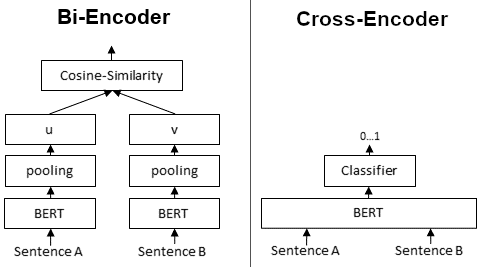

<br>

In [141]:
# Import the CrossEncoder library from sentence_transformers

from sentence_transformers import CrossEncoder, util

In [142]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [143]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [144]:
# Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [145]:
results_df

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Chunk_No.': 1, 'Page_No.': 'Page 20'}","Insurance $0.210 for each $1,000 of insurance ...",0.826140,33,-8.634693
1,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Section F - Individual Purchase Rights Article...,0.842570,79,-4.137320
2,"{'Chunk_No.': 1, 'Page_No.': 'Page 46'}","Benefit (or approved amount, if applicable) as...",0.844768,91,-8.431918
3,"{'Chunk_No.': 1, 'Page_No.': 'Page 59'}","highest amount available, not to exceed 50%. A...",0.936613,122,-8.944489
4,"{'Chunk_No.': 2, 'Page_No.': 'Page 43'}",Coverage During Disability benefit in force on...,0.940958,83,-5.141590
5,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Member Life Insurance or Coverage During Disab...,0.955051,81,-6.916842
6,"{'Chunk_No.': 1, 'Page_No.': 'Page 53'}",Section B - Member Accidental Death and Dismem...,0.959901,108,-10.078198
7,"{'Chunk_No.': 2, 'Page_No.': 'Page 30'}","(6) If, on the date a Member becomes eligible ...",0.971320,53,-10.217793
8,"{'Chunk_No.': 1, 'Page_No.': 'Page 8'}",Section A - Member Life Insurance Schedule of ...,0.971954,8,-7.865868
9,"{'Chunk_No.': 1, 'Page_No.': 'Page 59'}",Section C - Dependent Life Insurance Article 1...,0.977558,121,-7.851462


In [146]:
# Return the top 3 results from semantic search

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Chunk_No.': 1, 'Page_No.': 'Page 20'}","Insurance $0.210 for each $1,000 of insurance ...",0.826140,33,-8.634693
1,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Section F - Individual Purchase Rights Article...,0.842570,79,-4.137320
2,"{'Chunk_No.': 1, 'Page_No.': 'Page 46'}","Benefit (or approved amount, if applicable) as...",0.844768,91,-8.431918


In [147]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
1,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Section F - Individual Purchase Rights Article...,0.842570,79,-4.137320
4,"{'Chunk_No.': 2, 'Page_No.': 'Page 43'}",Coverage During Disability benefit in force on...,0.940958,83,-5.141590
5,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}",Member Life Insurance or Coverage During Disab...,0.955051,81,-6.916842


In [148]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]
top_3_RAG

,Documents,Metadatas
1,Section F - Individual Purchase Rights Article...,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}"
4,Coverage During Disability benefit in force on...,"{'Chunk_No.': 2, 'Page_No.': 'Page 43'}"
5,Member Life Insurance or Coverage During Disab...,"{'Chunk_No.': 2, 'Page_No.': 'Page 42'}"


## 4 <font color = red> Generation Layer

## 4.1 Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

In [149]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
                {"role": "system", "content":  "You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents."},
                {"role": "user", "content": f"""You are a helpful assistant in the insurance domain who can effectively answer user queries about insurance policies and documents.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{top_3_RAG}'. These search results are essentially one page of an insurance document that may be relevant to the user query.

                                                The column 'documents' inside this dataframe contains the actual text from the policy document and the column 'metadata' contains the policy name and source page. The text inside the document may also contain tables in the format of a list of lists where each of the nested lists indicates a row.

                                                Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                                """},
              ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    return response.choices[0].message.content.split('\n')

In [151]:
# Read the OpenAI API key
import os
openai.api_key = open("/content/drive/MyDrive/HelpMateAI/OPENAI_API_Key.txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

In [152]:
# Generate the response

response = generate_response(query, top_3_RAG)

In [153]:
# Print the response

print("\n".join(response))

The life insurance coverage for senior citizens can vary depending on the specific policy and provider. To provide accurate information, it would be best to refer to the actual policy documents provided. Below are the details extracted from relevant policy documents in the dataframe:

### Life Insurance Coverage for Senior Citizens:

| Policy Name                                    | Page Number | Life Insurance Coverage            |
|-----------------------------------------------|-------------|------------------------------------|
| Individual Purchase Rights                    | Page 42    | Specific coverage details          |
| Coverage During Disability benefit in force  | Page 43    | Coverage information available     |
| Member Life Insurance or Coverage During Disab | Page 42    | Details on life insurance coverage  |

For detailed information on the life insurance coverage for senior citizens, it is recommended to refer to the corresponding policy documents mentioned above.
